In [13]:
cd C:\\Users\\msn47\\OneDrive\\Desktop\\Summer_24\\house-prices-advanced-regression-techniques

C:\Users\msn47\OneDrive\Desktop\Summer_24\house-prices-advanced-regression-techniques


In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


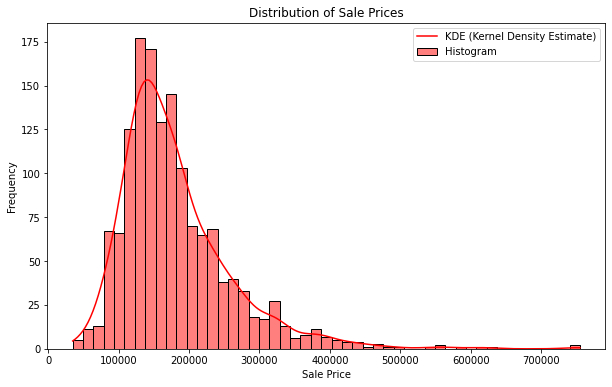

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color='red')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

#KDE -->  A smoothed curve that estimates the probability density function 
plt.legend(['KDE (Kernel Density Estimate)', 'Histogram'])
plt.show()


# Checking missing values for each col.

In [10]:
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train)) * 100
print(pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent']))

             Total    Percent
PoolQC        1453  99.520548
MiscFeature   1406  96.301370
Alley         1369  93.767123
Fence         1179  80.753425
FireplaceQu    690  47.260274
...            ...        ...
MasVnrArea       0   0.000000
Exterior2nd      0   0.000000
Exterior1st      0   0.000000
RoofMatl         0   0.000000
SalePrice        0   0.000000

[81 rows x 2 columns]


In [15]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == "object":
            # For categorical data, fill missing values with the mode
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            # For numerical data, fill missing values with the median
            df[column] = df[column].fillna(df[column].median())
    return df


train = fill_missing_values(train)
test = fill_missing_values(test)


print(train.isnull().sum().sum())  # Should output 0
print(test.isnull().sum().sum())   # Should output 0

0
0


# Trying to compute correlation matrix so that can get any feature --> price

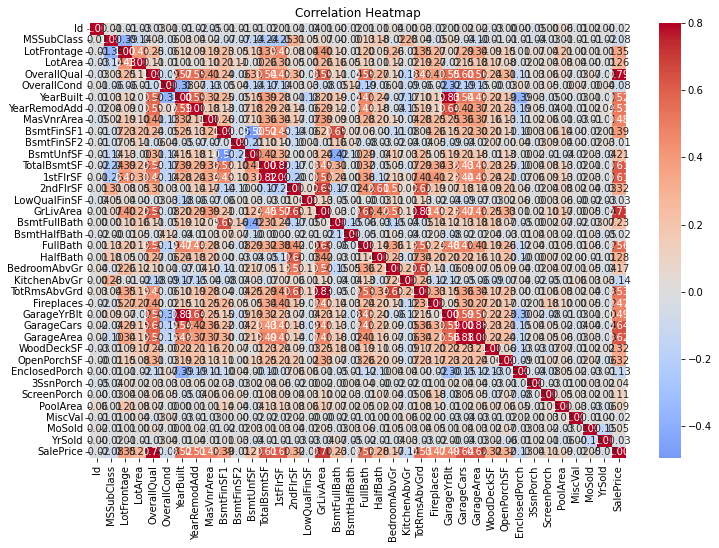

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [17]:
# Compute the correlation matrix
corr_matrix = train.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmax=0.8, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Identify features with high correlation to SalePrice
corr_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_target)
high_corr_features = corr_target[abs(corr_target) > 0.5].index.tolist()



In [18]:
print(f'The factors with most correlation are {high_corr_features}')

The factors with most correlation are ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex', 'GarageFinish_Unf', 'KitchenQual_TA', 'ExterQual_TA']


# Quick check to see if NAN values are gone

In [17]:
# Check for NaN values
print("Missing values in train set:", train.isnull().sum().sum())
print("Missing values in test set:", test.isnull().sum().sum())

# Replace infinite values with NaN and then fill them
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values again just in case
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)


Missing values in train set: 0
Missing values in test set: 0


# Preprocessing

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Calculate high correlation features
corr_matrix = train.corr()
corr_target = corr_matrix["SalePrice"]
high_corr_features = corr_target[abs(corr_target) > 0.5].index.tolist()
high_corr_features.remove('SalePrice')  # Remove the target variable

# Handle missing values
def fill_missing_values(df, features):
    for column in features:
        if column in df.columns:
            if df[column].dtype == "object":
                # For categorical data, fill missing values with the mode
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                # For numerical data, fill missing values with the median
                df[column] = df[column].fillna(df[column].median())
    return df

# Apply the function to both train and test datasets
train = fill_missing_values(train, high_corr_features)
test = fill_missing_values(test, high_corr_features)

# Convert `MSSubClass` to string if included
if 'MSSubClass' in high_corr_features:
    train['MSSubClass'] = train['MSSubClass'].astype(str)
    test['MSSubClass'] = test['MSSubClass'].astype(str)

# Select the relevant features from the datasets
X = train[high_corr_features]
y = train['SalePrice']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test[high_corr_features], drop_first=True)

# Add missing columns with zeros to ensure alignment
missing_cols_train = set(test.columns) - set(X.columns)
missing_cols_test = set(X.columns) - set(test.columns)

for col in missing_cols_train:
    X[col] = 0
for col in missing_cols_test:
    test[col] = 0

# Align train and test dataframes
X, test = X.align(test, join='inner', axis=1)

# Log transform the target variable for normality
y = np.log1p(y)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)




In [10]:
test.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0


# Training model on Random forest

Random Forest RMSE: 0.16634429802316825


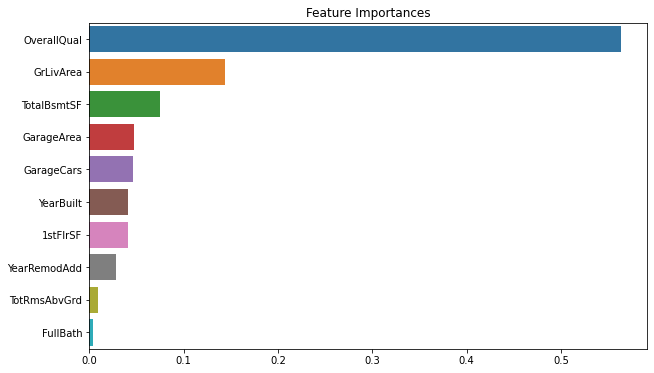

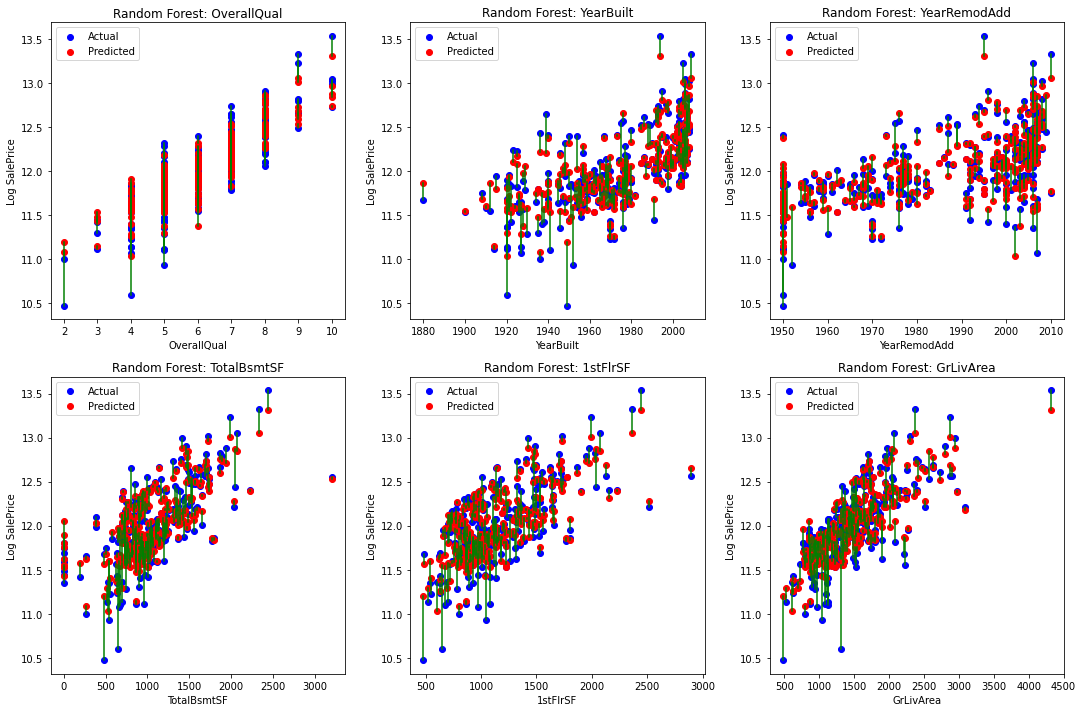

In [13]:
# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf.predict(X_valid)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('Random Forest RMSE:', rmse)

# Feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

# Plot actual vs. predicted values for top features
top_features = high_corr_features[:6]  # Select top 6 features for visualization

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_valid[feature], y_valid, color='blue', label='Actual')
    plt.scatter(X_valid[feature], y_pred, color='red', label='Predicted')
    for j in range(len(y_valid)):
        plt.plot([X_valid[feature].iloc[j], X_valid[feature].iloc[j]], 
                 [y_valid.iloc[j], y_pred[j]], color='green')
    plt.xlabel(feature)
    plt.ylabel('Log SalePrice')
    plt.title(f'Random Forest: {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [26]:
missing_in_train = [feat for feat in selected_features if feat not in train.columns]
missing_in_test = [feat for feat in selected_features if feat not in test.columns]
print("Missing in train:", missing_in_train)
print("Missing in test:", missing_in_test)


Missing in train: ['BsmtQual_Ex', 'KitchenQual_Ex', 'GarageFinish_Unf', 'KitchenQual_TA', 'ExterQual_TA']
Missing in test: ['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'GarageFinish_Unf', 'KitchenQual_TA', 'ExterQual_TA']


In [30]:
# Make predictions on the test set
test_predictions = rf.predict(X_valid)  # Predict on the validation set instead of the test set

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(test_predictions)))  # Convert back from log-transformed values
print('Testing RMSE:', test_rmse)




Testing RMSE: 29499.089430455908


In [33]:
rf.score(X_valid, y_valid)


0.8517213498838564

In [35]:
# Make predictions on the test set
test_predictions = rf.predict(X_valid)  # Predict on the validation set instead of the test set

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(test_predictions)))  # Convert back from log-transformed values
print('Testing RMSE:', test_rmse)



Testing RMSE: 29499.089430455908


# Lasso regression

In [36]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust the alpha (regularization strength) as needed
lasso.fit(X_train, y_train)

# Predict on the validation set
y_pred = lasso.predict(X_valid)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('Lasso Regression RMSE:', rmse)


Lasso Regression RMSE: 0.19809679695454555


In [37]:
# Calculate R-squared (R2) score
r2 = lasso.score(X_valid, y_valid)
print('Lasso Regression R-squared (R2) Score:', r2)


Lasso Regression R-squared (R2) Score: 0.789710449205792


# Using lasso, linear and random forest for XGBoost

In [43]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 2. Implement Lasso Regression
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)
lasso_rmse = np.sqrt(mean_squared_error(y_valid, lasso.predict(X_valid)))
print('Lasso Regression RMSE:', lasso_rmse)

# 3. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_rmse = np.sqrt(mean_squared_error(y_valid, linear_reg.predict(X_valid)))
print('Linear Regression RMSE:', linear_rmse)

# 4. Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_rmse = np.sqrt(mean_squared_error(y_valid, rf.predict(X_valid)))
print('Random Forest RMSE:', rf_rmse)

# 5. XGBoost with Parameter Tuning
xgb = XGBRegressor(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model
best_xgb_rmse = np.sqrt(mean_squared_error(y_valid, best_xgb_model.predict(X_valid)))
print('XGBoost (Best Model) RMSE:', best_xgb_rmse)


Lasso Regression RMSE: 0.19809679695454555
Linear Regression RMSE: 0.17059678530587535
Random Forest RMSE: 0.16634429802316825
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[C

In [51]:
# Evaluate the best model
best_xgb_score = best_xgb_model.score(X_valid, y_valid)
print('XGBoost (Best Model) Score:', best_xgb_score)


XGBoost (Best Model) Score: 0.8635409010413341


In [59]:
# 1. Generate predictions for the test set using the best XGBoost model
test_predictions = best_xgb_model.predict(test)

# 2. Take the exponential of the predicted sale prices to revert from logarithmic scale
original_test_predictions = np.exp(test_predictions)

# 3. Prepare the submission DataFrame with Id and SalePrice columns
test_data = pd.read_csv("test.csv")
test_id = test_data['Id']
submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': original_test_predictions})

# 4. Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


# RMSE lines during linear regression

Linear Regression RMSE: 0.17059678530587535


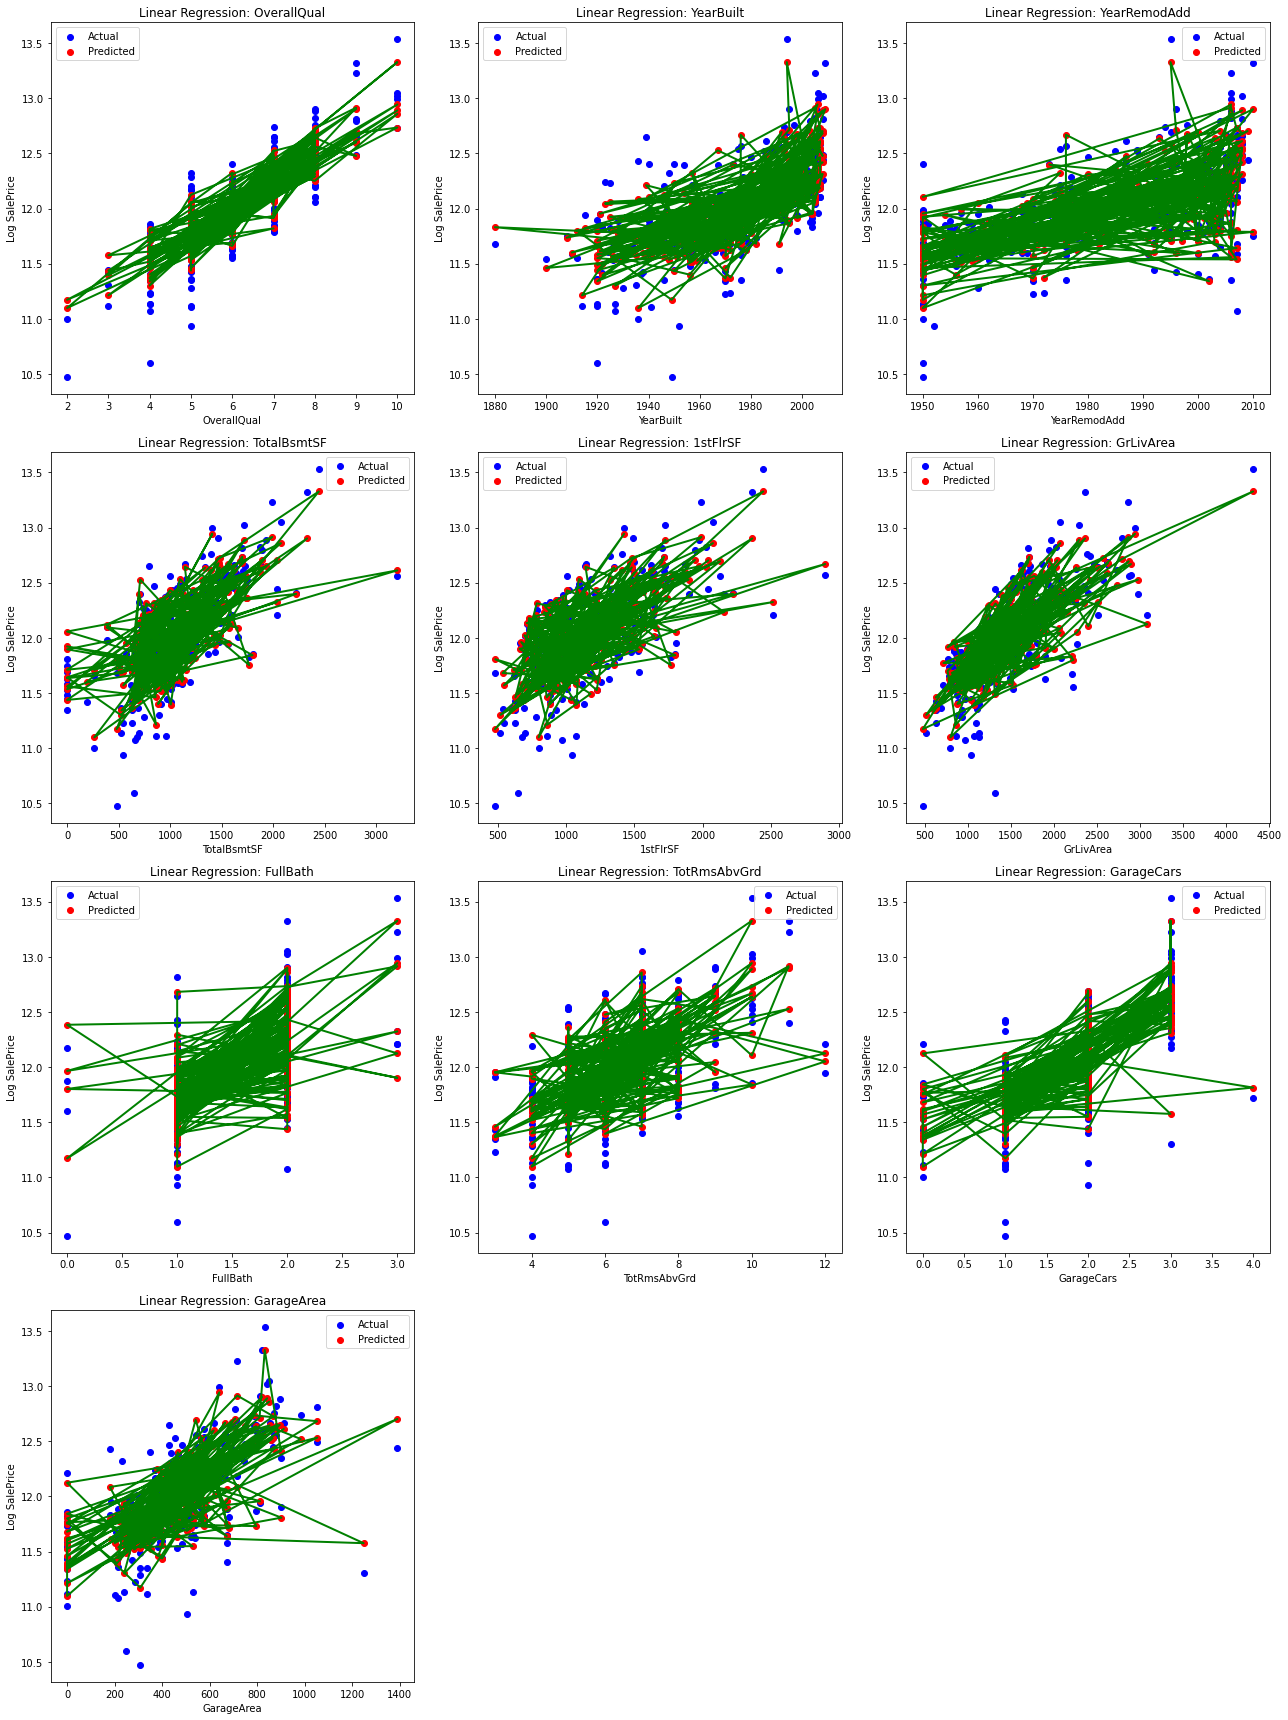

In [10]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on validation set
y_pred = linear_reg.predict(X_valid)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('Linear Regression RMSE:', rmse)


# Plot the regression line for each feature
num_features = len(high_corr_features)
num_cols = 3  # Number of columns in the plot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(18, num_rows * 6))

for i, feature in enumerate(high_corr_features):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(X_valid[feature], y_valid, color='blue', label='Actual')
    plt.scatter(X_valid[feature], y_pred, color='red', label='Predicted')
    plt.plot(X_valid[feature], y_pred, color='green', linewidth=2)
    plt.xlabel(feature)
    plt.ylabel('Log SalePrice')
    plt.title(f'Linear Regression: {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from sklearn.linear_model import SGDRegressor

# Define the model
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Fit the model
sgd.fit(X_train, y_train)

# Evaluate the model
sgd_rmse = np.sqrt(mean_squared_error(y_valid, sgd.predict(X_valid)))
print('SGD Regressor RMSE:', sgd_rmse)


SGD Regressor RMSE: 2531954378365936.0


# Trying new features

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Handle missing values
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == "object":
            # For categorical data, fill missing values with the mode
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            # For numerical data, fill missing values with the median
            df[column] = df[column].fillna(df[column].median())
    return df

# Apply the function to both train and test datasets
train = fill_missing_values(train)
test = fill_missing_values(test)

# Select the relevant features from the datasets
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Add missing columns with zeros to ensure alignment
missing_cols_train = set(test.columns) - set(X.columns)
missing_cols_test = set(X.columns) - set(test.columns)

for col in missing_cols_train:
    X[col] = 0
for col in missing_cols_test:
    test[col] = 0

# Align train and test dataframes
X, test = X.align(test, join='inner', axis=1)

# Log transform the target variable for normality
y = np.log1p(y)

# Feature Engineering: Create new features
X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['GrLivArea']
X['TotalBath'] = X['FullBath'] + X['HalfBath'] + X['BsmtFullBath'] + X['BsmtHalfBath']
X['TotalPorchSF'] = X['OpenPorchSF'] + X['3SsnPorch'] + X['EnclosedPorch'] + X['ScreenPorch'] + X['WoodDeckSF']

test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['GrLivArea']
test['TotalBath'] = test['FullBath'] + test['HalfBath'] + test['BsmtFullBath'] + test['BsmtHalfBath']
test['TotalPorchSF'] = test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
test_poly = poly.transform(test)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
test_scaled = scaler.transform(test_poly)

# Model Training and Evaluation
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_rmse = np.sqrt(mean_squared_error(y_valid, rf.predict(X_valid_scaled)))
print('Random Forest RMSE with new features:', rf_rmse)

# Generate predictions for the test set
test_predictions = rf.predict(test_scaled)
log_test_predictions = np.expm1(test_predictions)  # Convert back from log-transformed values


Random Forest RMSE with new features: 0.14007084581134432


In [23]:
# Generate predictions for the test set
test_predictions_log = rf.predict(test_scaled)
test_predictions = np.expm1(test_predictions_log)  # Convert back from log-transformed values

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)


In [24]:
print('Random Forest R² score:', rf.score(X_valid_scaled, y_valid))


Random Forest R² score: 0.8948623444168463


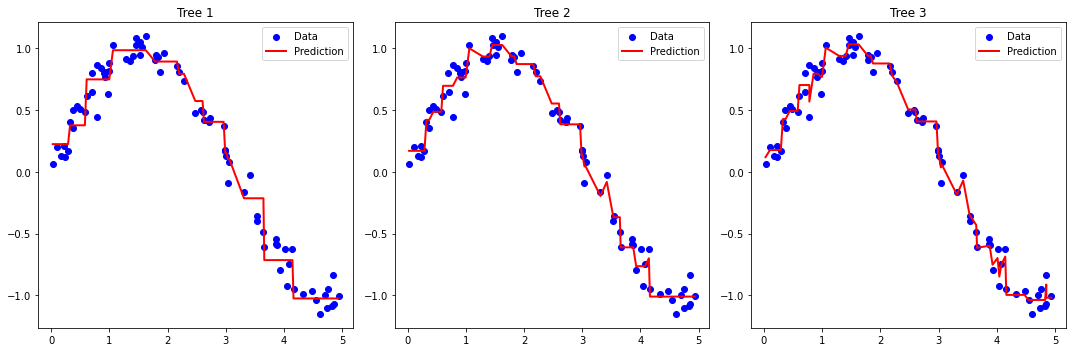

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Generate synthetic data for visualization
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Fit an XGBoost model
xgb = XGBRegressor(n_estimators=3, learning_rate=1, max_depth=3)
xgb.fit(X, y)

# Predict
y_pred = np.zeros_like(y)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, ax in enumerate(axes):
    # Fit the i-th tree
    xgb.fit(X, y - y_pred)
    tree_pred = xgb.predict(X)
    
    # Update prediction
    y_pred += tree_pred
    
    # Plot data and prediction
    ax.scatter(X, y, color="blue", label="Data")
    ax.plot(X, y_pred, color="red", linewidth=2, label="Prediction")
    ax.set_title(f"Tree {i+1}")
    ax.legend()

plt.tight_layout()
plt.show()


# Try to improve rmse 